In [1]:
import torch
from mnist import get_onehot_encoded_MNIST_dataloaders
from mnist import get_MNIST_dataloaders
from mnist import create_soft_label_MNIST_dataloader
from tree import DecisionTree
from net import Net
from tree_trainer import TreeTrainer
from net_trainer import NetTrainer
from plot import plot_accuracies, plot_losses, plot_mnist
from load_custom_digits import load_custom_digits

In [2]:
batch_size = 1000
device_tree = "cpu"
device_net = "cuda" if torch.cuda.is_available() else "cpu"
tree_max_depth = 5
epochs_hard_tree = 25
epochs_soft_tree = 25
epochs_net = 10

In [3]:
def train(trainer, epochs, train_loader, val_loader):
    train_accuracies, train_losses = [], []
    val_accuracies, val_losses = [], []
    for epoch in range(epochs):
        acc, loss = trainer.train(train_loader)
        train_accuracies.append(acc)
        train_losses.append(loss)
        print(f"{epoch + 1}/{epochs}: train accuracy: {acc}")

        acc, loss = trainer.validate(val_loader)
        val_accuracies.append(acc)
        val_losses.append(loss)
        print(f"{epoch + 1}/{epochs}: val accuracy: {acc}")

    plot_accuracies(train_accuracies, val_accuracies)
    plot_losses(train_losses, val_losses)

In [4]:
train_loader, val_loader, test_loader = get_onehot_encoded_MNIST_dataloaders(batch_size)

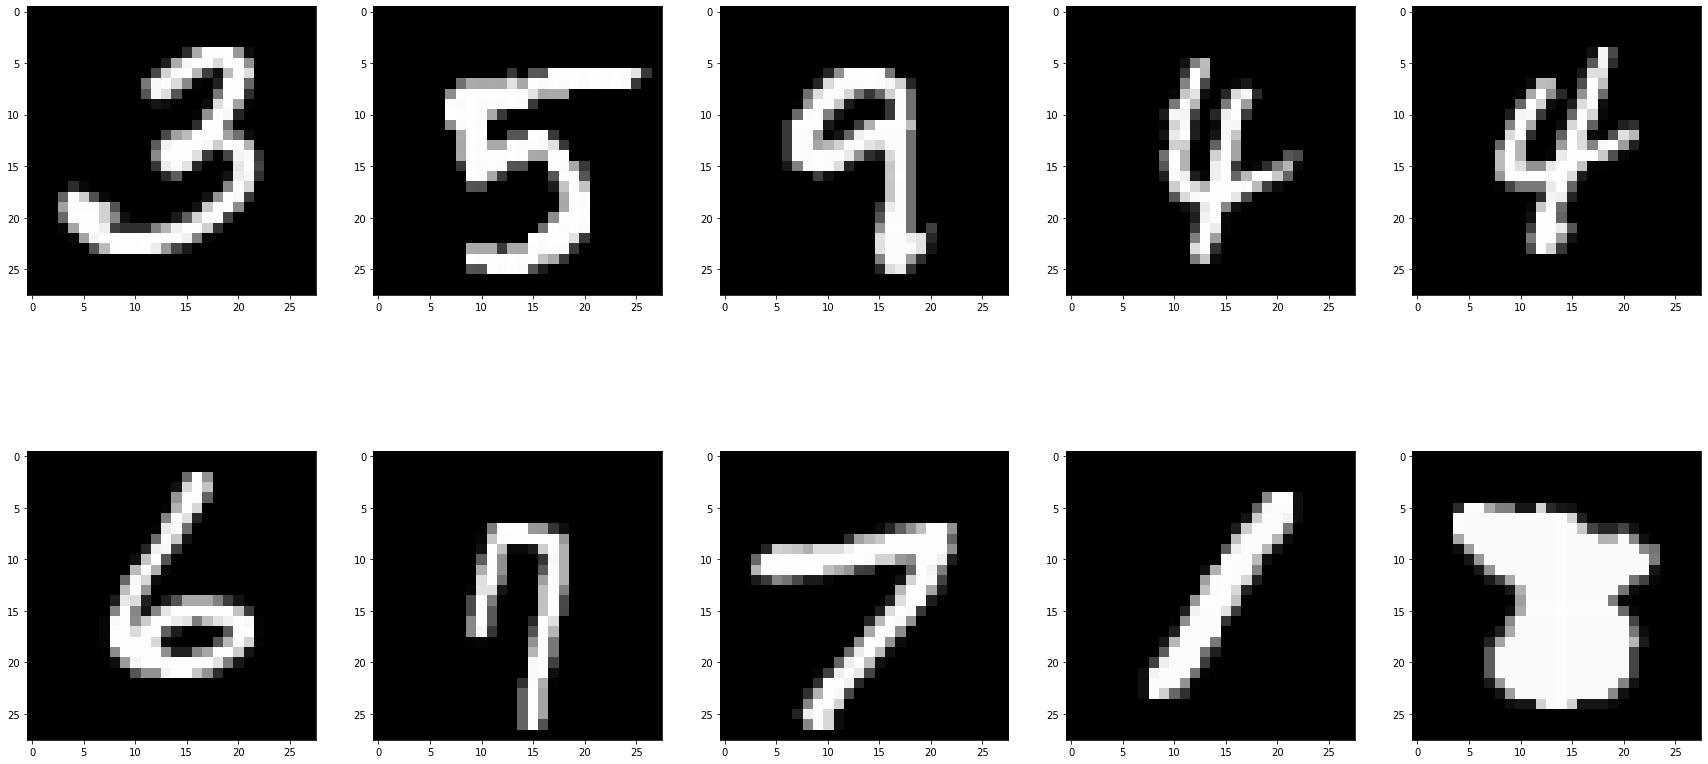

In [5]:
plot_mnist(train_loader)

In [6]:
hard_tree = DecisionTree(tree_max_depth, 28 * 28, 10, device_tree)
hard_tree_trainer = TreeTrainer(hard_tree, device_tree)

1/25: train accuracy: 0.380875
1/25: val accuracy: 0.5463333333333333
2/25: train accuracy: 0.5714583333333333
2/25: val accuracy: 0.5915
3/25: train accuracy: 0.6492708333333334
3/25: val accuracy: 0.7348333333333333
4/25: train accuracy: 0.7686666666666667
4/25: val accuracy: 0.7869999999999999
5/25: train accuracy: 0.8461875000000001
5/25: val accuracy: 0.871
6/25: train accuracy: 0.8811458333333334
6/25: val accuracy: 0.8884166666666667
7/25: train accuracy: 0.8962291666666666
7/25: val accuracy: 0.8986666666666666
8/25: train accuracy: 0.9049791666666667
8/25: val accuracy: 0.90225
9/25: train accuracy: 0.9115625
9/25: val accuracy: 0.907
10/25: train accuracy: 0.9161250000000001
10/25: val accuracy: 0.9095833333333333
11/25: train accuracy: 0.9192083333333333
11/25: val accuracy: 0.9100833333333336
12/25: train accuracy: 0.9220625
12/25: val accuracy: 0.9119166666666668
13/25: train accuracy: 0.9252916666666667
13/25: val accuracy: 0.91425
14/25: train accuracy: 0.926854166666666

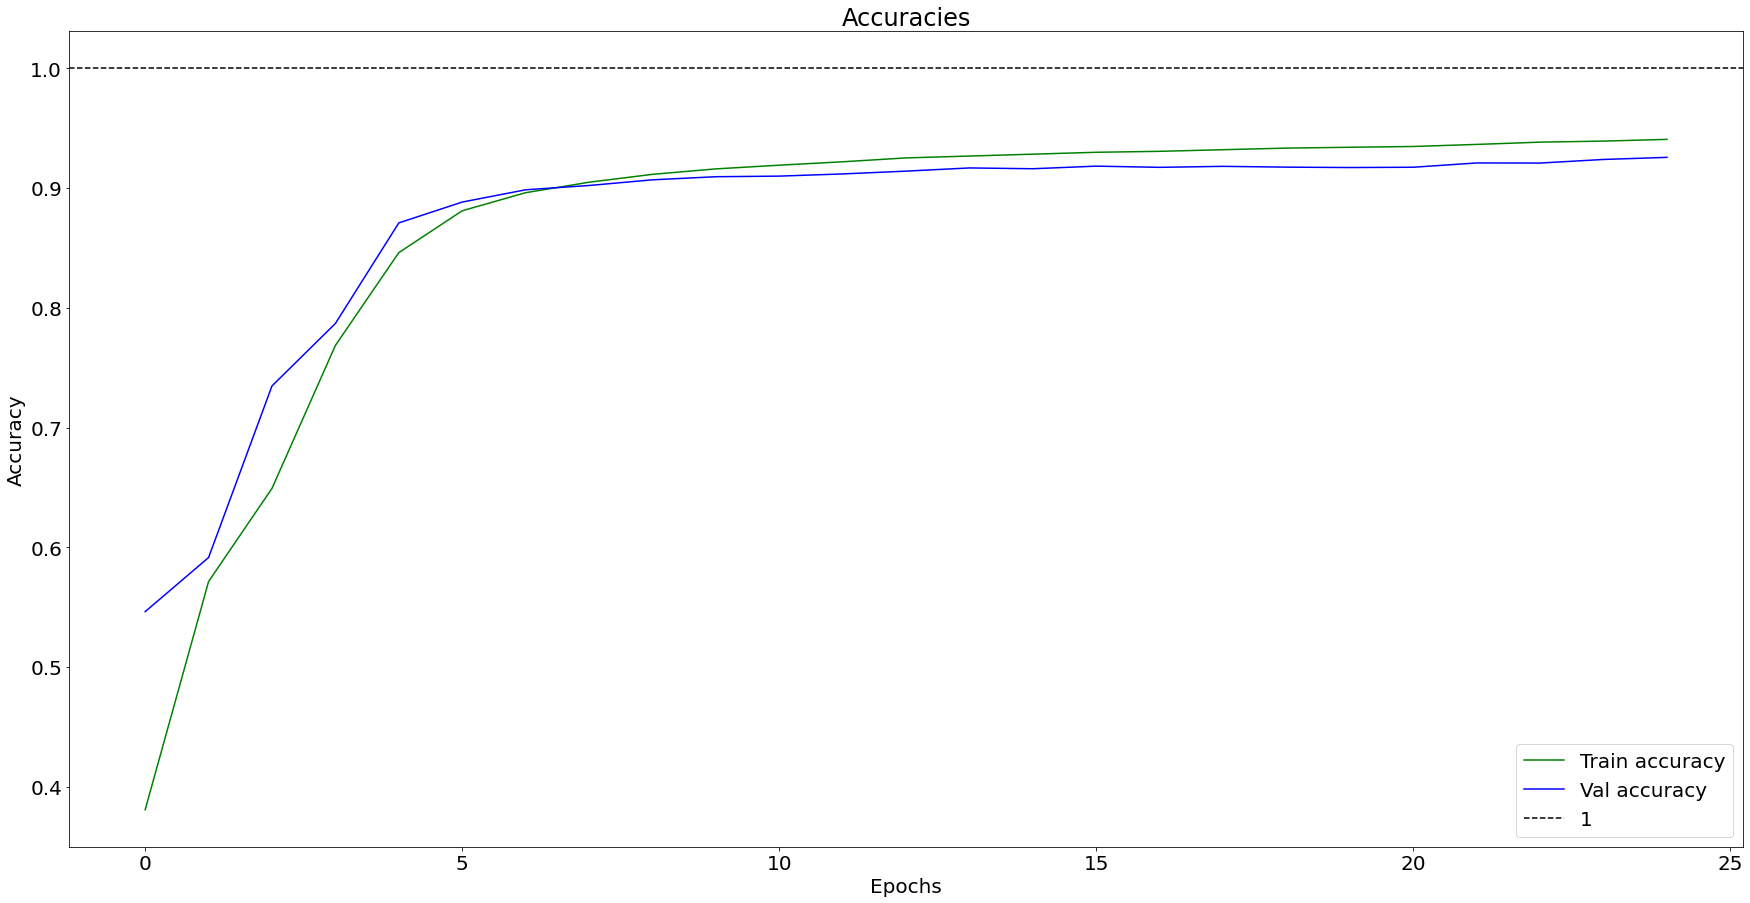

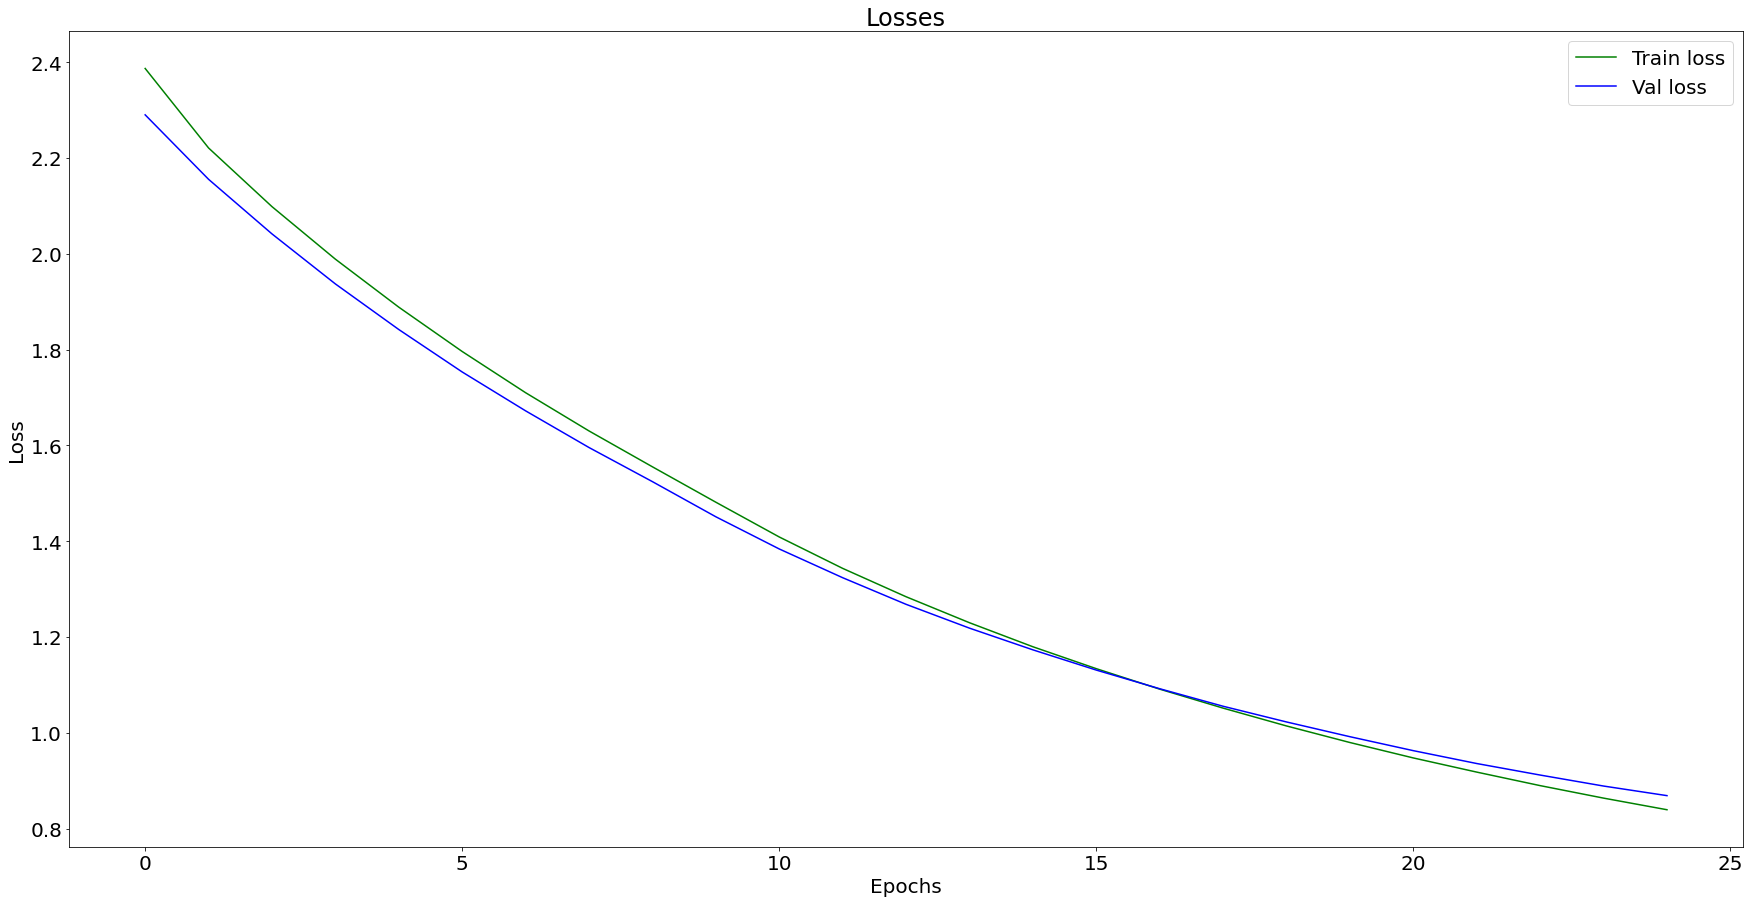

In [7]:
train(hard_tree_trainer, epochs_hard_tree, train_loader, val_loader)

In [8]:
test_acc, _ = hard_tree_trainer.validate(test_loader)
test_acc

0.9327000000000002

In [9]:
train_loader, val_loader, test_loader = get_MNIST_dataloaders(batch_size)

In [10]:
net = Net().to(device_net)
net_trainer = NetTrainer(net, device_net)

1/10: train accuracy: 0.7697916651765505
1/10: val accuracy: 0.9349166651566824
2/10: train accuracy: 0.9540416685243448
2/10: val accuracy: 0.96124999721845
3/10: train accuracy: 0.9674583338201046
3/10: val accuracy: 0.9704166700442632
4/10: train accuracy: 0.9759374981125196
4/10: val accuracy: 0.979083334406217
5/10: train accuracy: 0.9794583357870579
5/10: val accuracy: 0.9775833338499069
6/10: train accuracy: 0.9828124965230624
6/10: val accuracy: 0.9829166630903879
7/10: train accuracy: 0.9851666614413261
7/10: val accuracy: 0.9855833301941553
8/10: train accuracy: 0.9870625026524067
8/10: val accuracy: 0.9862499932448069
9/10: train accuracy: 0.9872916638851166
9/10: val accuracy: 0.984083334604899
10/10: train accuracy: 0.9887291664878527
10/10: val accuracy: 0.983666663368543


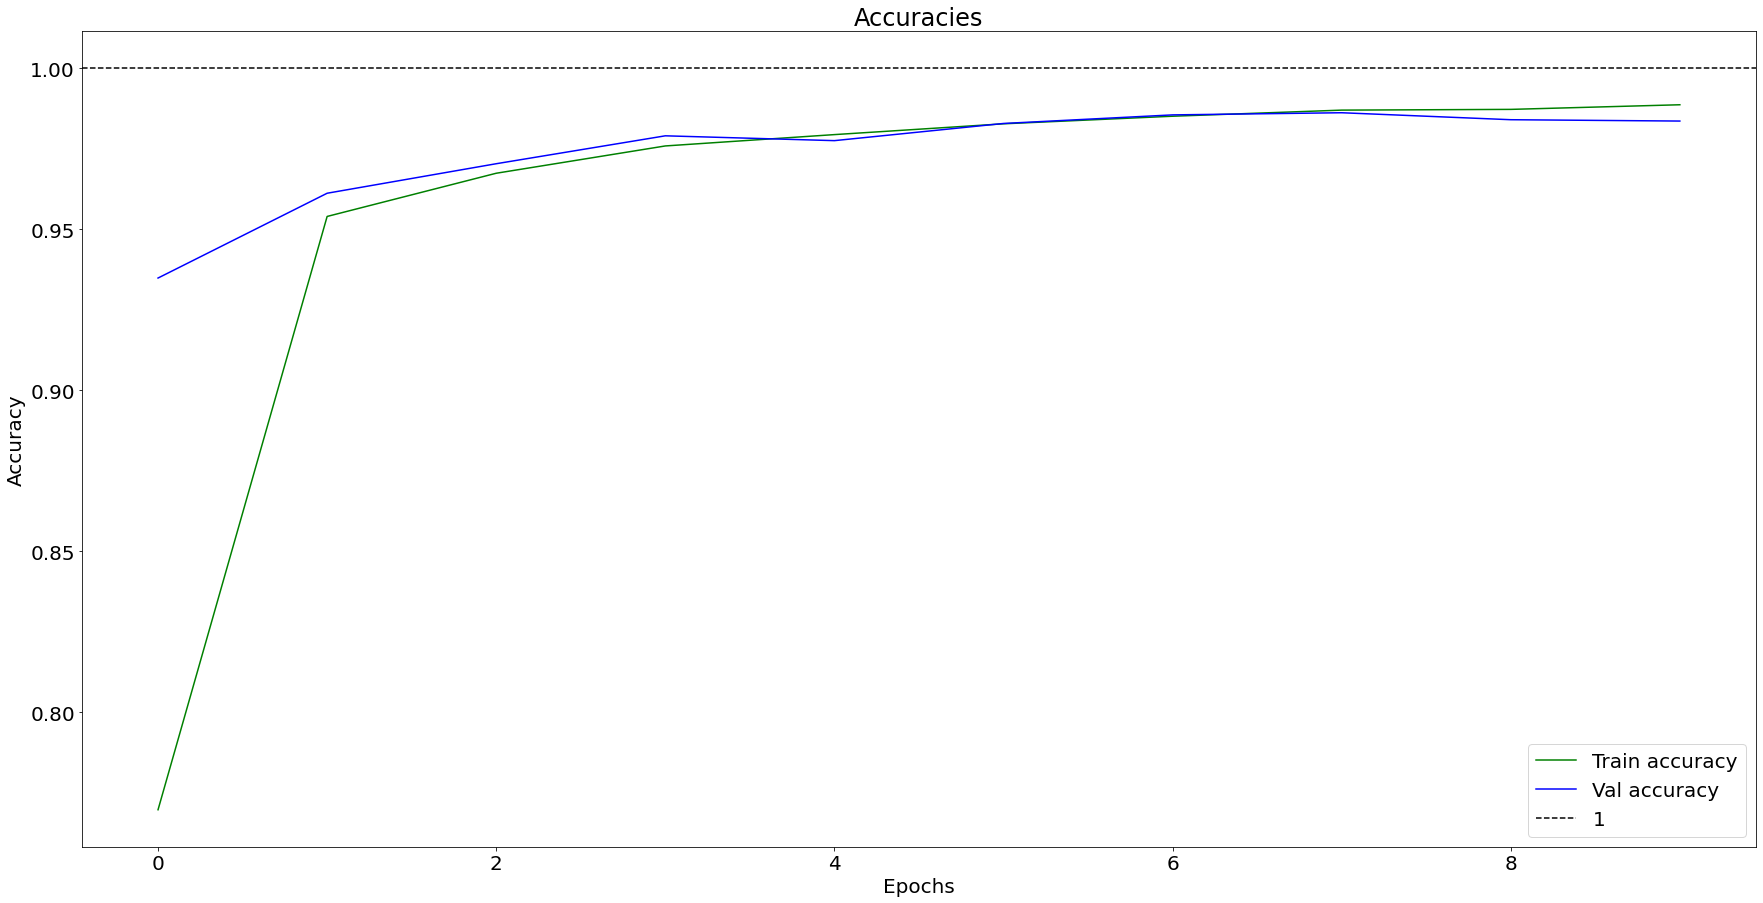

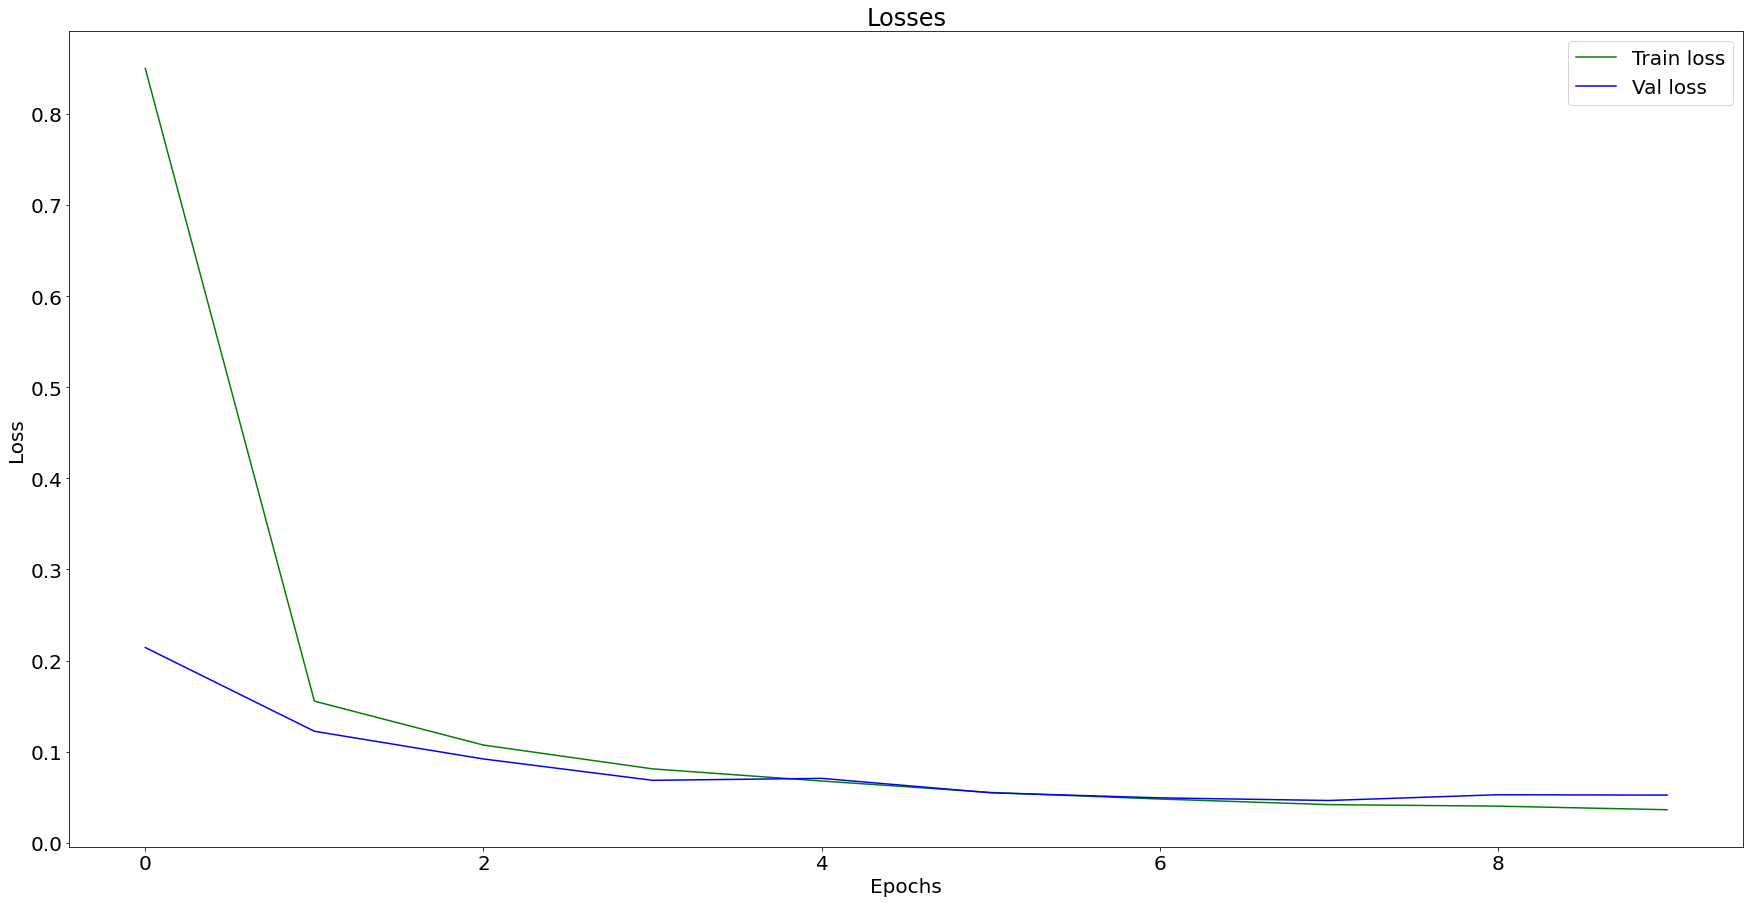

In [11]:
train(net_trainer, epochs_net, train_loader, val_loader)

In [12]:
test_acc, _ = net_trainer.validate(test_loader)
test_acc

0.9865999937057495

In [13]:
train_loader = create_soft_label_MNIST_dataloader(net, train_loader, device_net)
_, val_loader, test_loader = get_onehot_encoded_MNIST_dataloaders(batch_size)

In [14]:
soft_tree = DecisionTree(tree_max_depth, 28 * 28, 10, device_tree)
soft_tree_trainer = TreeTrainer(soft_tree, device_tree)

1/25: train accuracy: 0.35114583333333327
1/25: val accuracy: 0.5178333333333334
2/25: train accuracy: 0.6579166666666666
2/25: val accuracy: 0.7120000000000001
3/25: train accuracy: 0.7248749999999999
3/25: val accuracy: 0.74125
4/25: train accuracy: 0.7585625
4/25: val accuracy: 0.7771666666666669
5/25: train accuracy: 0.8018333333333333
5/25: val accuracy: 0.8341666666666665
6/25: train accuracy: 0.8521666666666666
6/25: val accuracy: 0.8720833333333333
7/25: train accuracy: 0.8778333333333332
7/25: val accuracy: 0.8869166666666667
8/25: train accuracy: 0.8911250000000001
8/25: val accuracy: 0.8976666666666667
9/25: train accuracy: 0.9010416666666666
9/25: val accuracy: 0.9021666666666666
10/25: train accuracy: 0.9045
10/25: val accuracy: 0.9056666666666667
11/25: train accuracy: 0.9074583333333335
11/25: val accuracy: 0.9089999999999999
12/25: train accuracy: 0.9100000000000001
12/25: val accuracy: 0.9119166666666668
13/25: train accuracy: 0.9117291666666668
13/25: val accuracy: 0.

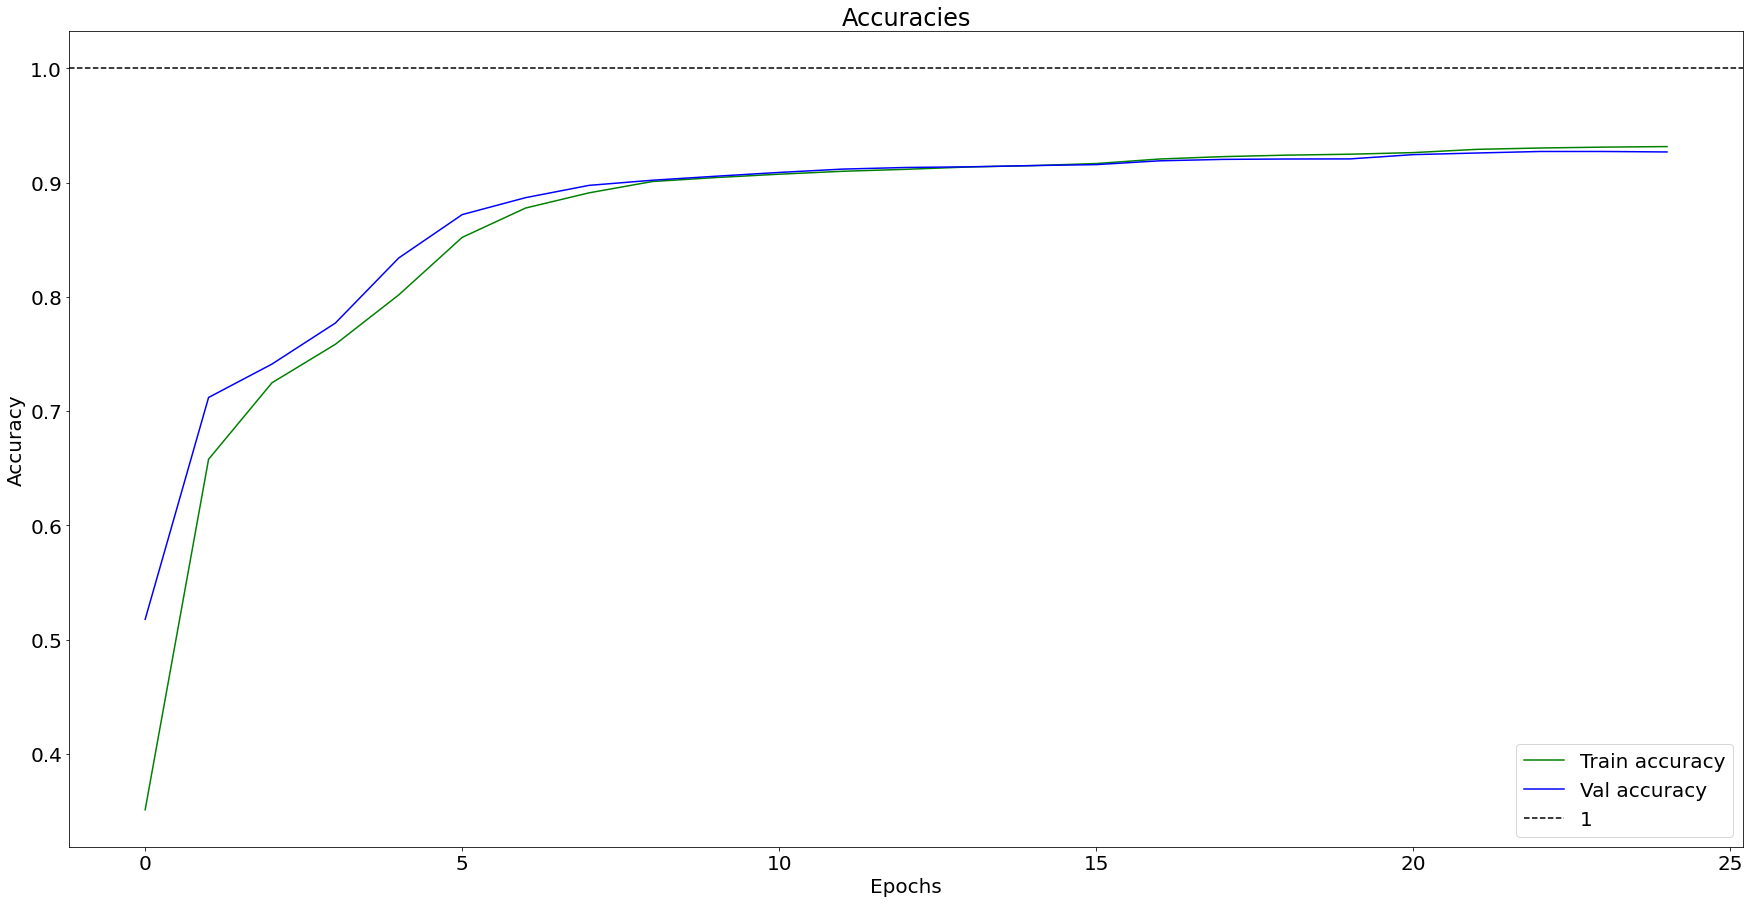

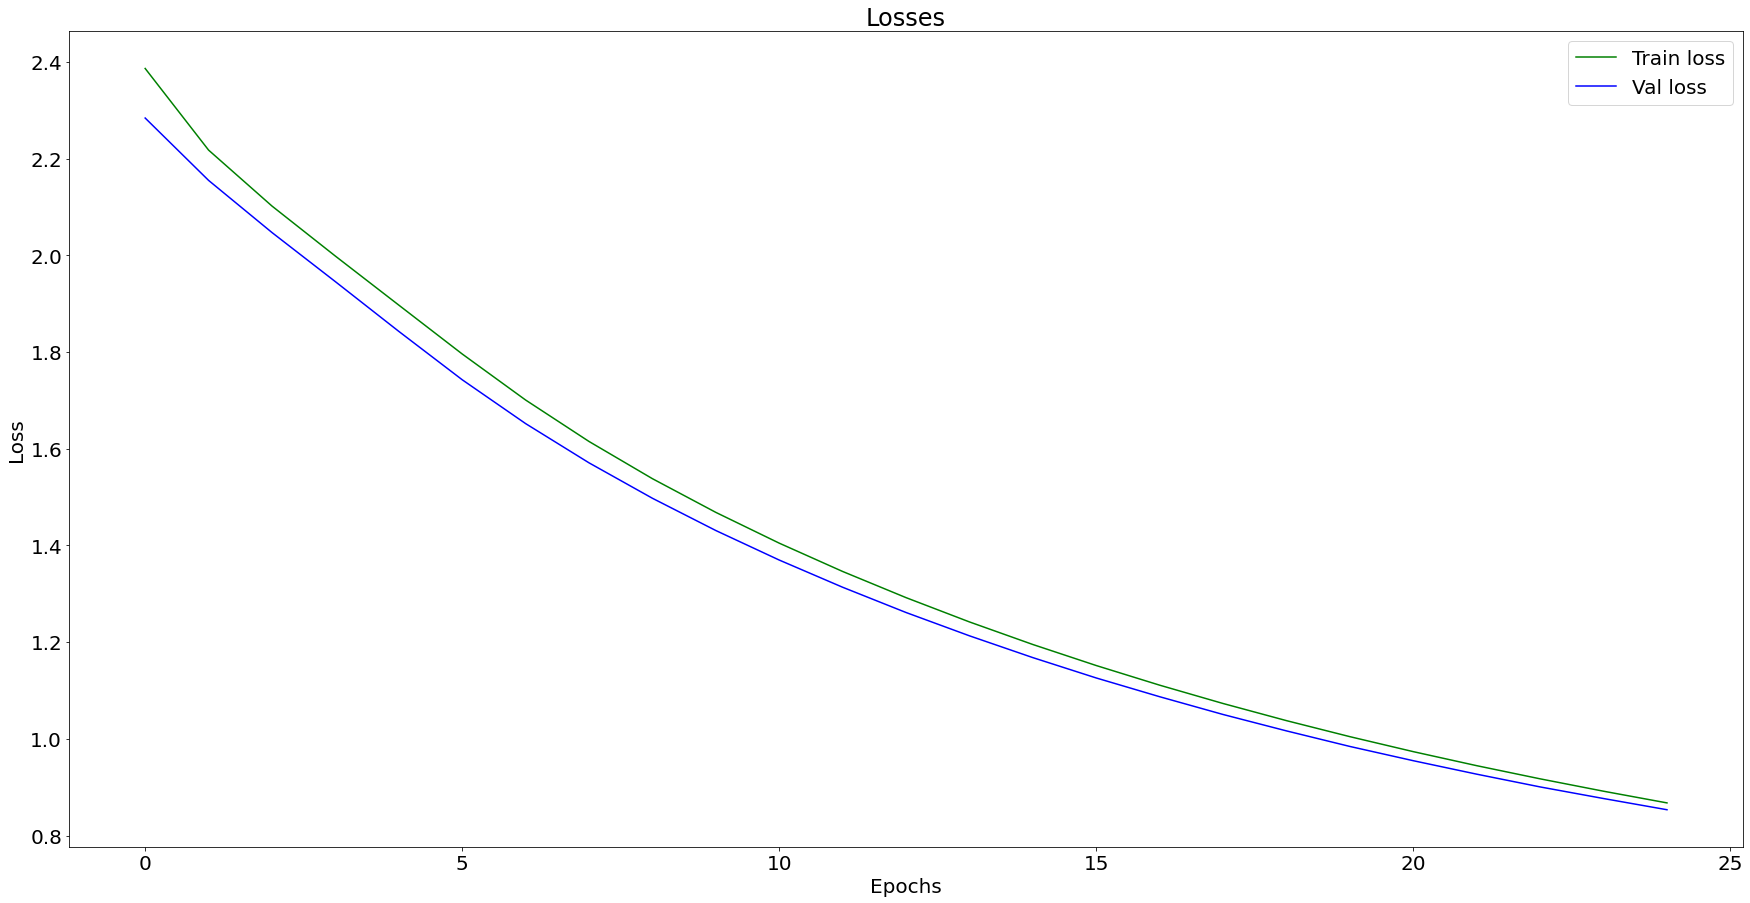

In [15]:
train(soft_tree_trainer, epochs_soft_tree, train_loader, val_loader)

In [16]:
test_acc, _ = soft_tree_trainer.validate(test_loader)
test_acc

0.9175000000000001

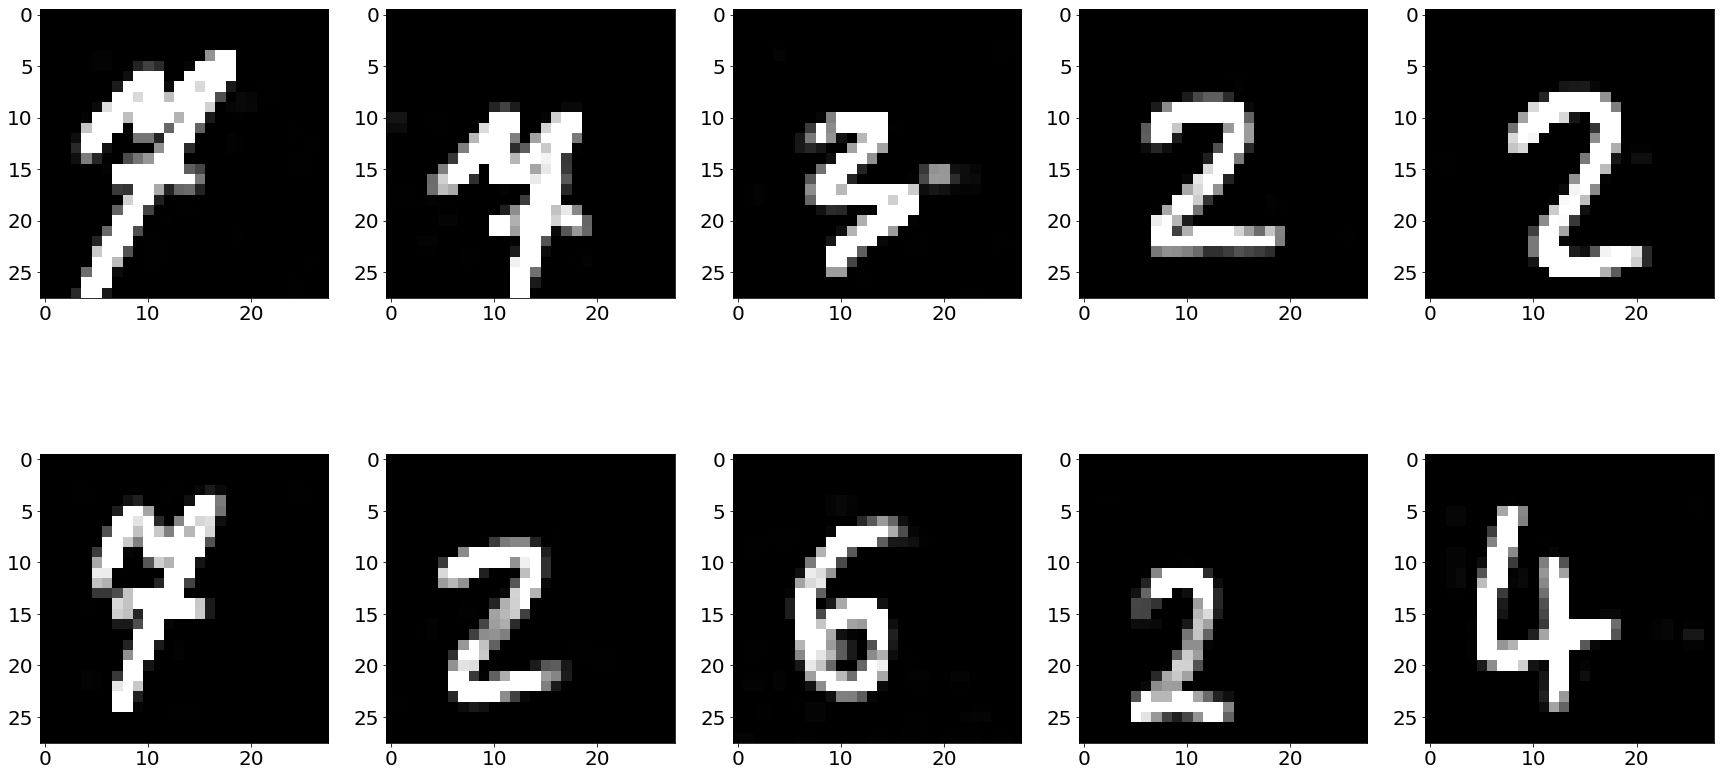

In [17]:
custom_digits_loader, custom_digits_loader_one_hot = load_custom_digits("grid.png", 266)
plot_mnist(custom_digits_loader)

In [18]:
test_acc, _ = hard_tree_trainer.validate(custom_digits_loader_one_hot)
test_acc

0.21616541353383456

In [19]:
test_acc, _ = net_trainer.validate(custom_digits_loader)
test_acc

0.5620300769805908

In [20]:
test_acc, _ = soft_tree_trainer.validate(custom_digits_loader_one_hot)
test_acc

0.22556390977443608